# Task 2: Prediction using Unsupervised ML (Clustering Technique)

## Import the essential libraries/ modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

## Read the data from comma separated values (CSV) file

In [2]:
iris_df = pd.read_csv("Iris.csv")
iris_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Checking out the dimension of the data 

In [4]:
iris_df.shape

(150, 6)

## Dataset Summary

In [5]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
iris_df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [7]:
iris_df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [8]:
iris_df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [9]:
iris_df['Species'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

In [10]:
iris_df.drop('Id', axis = 1, inplace=True) #Remove Id from the data 

In [11]:
iris_df   #No id left!

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


## A little visualization of the cleaned data

In [12]:
from IPython.display import Image    #Display Image
Image(url='http://carlosbaia.com/img/decision-tree-e-random-forest/iris-flowers.png',width=2000)

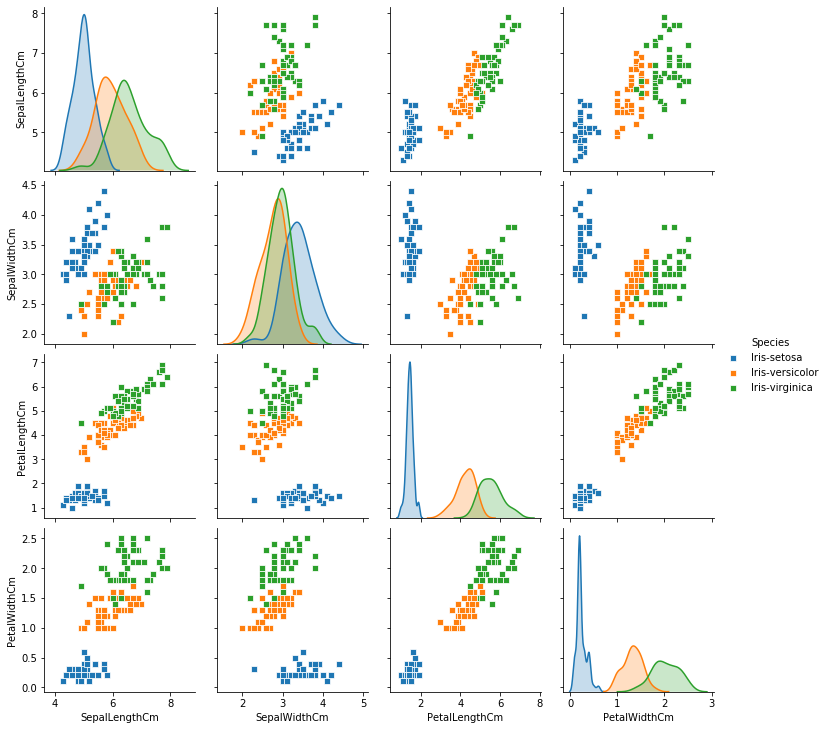

In [13]:
sns.pairplot(iris_df, hue='Species', markers='s')   #To check multiple relationship

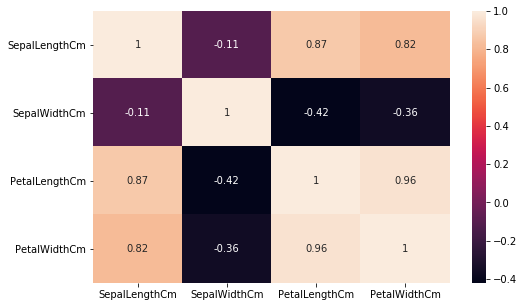

In [14]:
plt.figure(figsize=(8,5))                    #To check the intensity of the correlation coefficient
sns.heatmap(iris_df.corr(),annot=True)
plt.show()

# Implementing K-Means Algo
## Determining the optimum no. of clusters

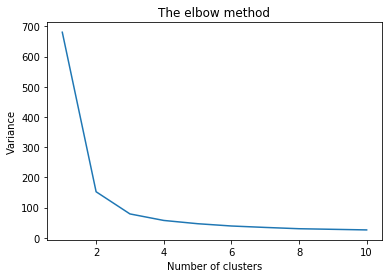

In [15]:
#Separating the i/p feature
ip_feature = iris_df.iloc[ :, [0,1,2,3]].values

var=[]  #List containing the value of no. of clusters...

for i in range(1, 11):              #Loop to run potimum no of clusters
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(ip_feature)
    var.append(kmeans.inertia_) #append the variance of the clusters for each value of i, in the list var
    
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 11), var)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Variance') # Within cluster sum of squares
plt.show()

#### ->  From the above observation, we conclude the optimum no. of clusters as 3 since the decrease in the variance value is less significant after the 3rd iteration 

In [16]:
#  Time for implementing the clustering algorithm

kmeans = KMeans(n_clusters = 3, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
op_feat = kmeans.fit_predict(ip_feature)
print(op_feat)                                        # Printing the predicted numerical categories

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


In [17]:
kmeans.cluster_centers_    #Giving the value of the cluster centres

array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]])

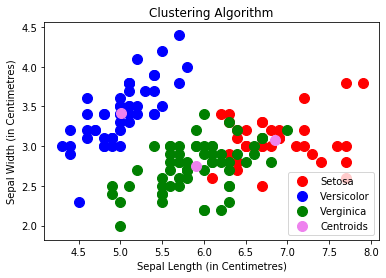

In [18]:

# Drawing the graph of the predicted cluster.

plt.scatter(ip_feature[ op_feat == 0, 0 ], ip_feature[ op_feat == 0, 1] ,
            s = 100, c = 'Red', label = 'Setosa')
plt.scatter(ip_feature[ op_feat == 1, 0 ], ip_feature[ op_feat == 1, 1] ,
            s = 100, c = 'Blue', label = 'Versicolor')
plt.scatter(ip_feature[ op_feat == 2, 0 ], ip_feature[ op_feat == 2, 1] ,
            s = 100, c = 'Green', label = 'Verginica')

# Plotting the cluster centres..
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1] ,
            s = 100, c = 'Violet', label = 'Centroids')

#Naming the title, x-axis and y-axis of the graph 

plt.title('Clustering Algorithm')
plt.xlabel('Sepal Length (in Centimetres)')
plt.ylabel('Sepal Width (in Centimetres)')
plt.legend()


#        -----------------X-----------------X----------------------X----------------

In [19]:
# Thank You!!